In [1]:
from ipynb.fs.full.prepare_data import *
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pylab as plt
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE, ADASYN
import pickle
import time

Loading data...
Attempting to connect to the database
Connected!
Fetching query...
Fetched!
Loading data in dataframe
Data loaded into dataframe!
Class imbalance check for label: title
Counter({'stay_at_home': 46928, 'workplace_closure': 26044, 'contact_tracing': 15082, 'school_closure': 14812, 'restrictions_on_gatherings': 7130, 'intern_travel_control': 2356})
Started data transformation...
Started preprocessing...
Extracting labels and features...
Labels and features extracted!
Encoding categorical features...
[array(['FEMALE', 'GENDER DIVERSE', 'MALE', 'UNSPECIFIED'], dtype=object), array(['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90+', '<20'],
      dtype=object), array(['No', 'Yes'], dtype=object), array(['April', 'August', 'December', 'February', 'January', 'July',
       'March', 'May', 'November', 'October', 'September'], dtype=object), array([False,  True]), array(['Fall', 'Spring', 'Summer', 'Winter'], dtype=object), array([False,  True]), array(['Durham Region Health

In [2]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [3]:
model = DecisionTreeClassifier(criterion="gini", max_depth=15, min_samples_split=40,
                               min_samples_leaf=30, random_state=10)

In [4]:
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
duration = end_time - start_time 
print(f"Model construction: {duration} seconds")

Model construction: 0.26697731018066406 seconds


In [5]:
from collections import Counter
Counter(y_train)

Counter({4: 37542, 0: 37542, 3: 37542, 5: 37542, 2: 37542, 1: 37542})

In [6]:
y_pred = model.predict(X_test)
recall = recall_score(y_pred, y_test, average = 'micro') * 100
precision = precision_score(y_pred, y_test, average = 'micro') * 100
print("Recall of Decision Tree {:.2f} %".format(recall))
print("precision of Decision Tree {:.2f} %".format(precision))

Recall of Decision Tree 95.52 %
precision of Decision Tree 95.52 %


In [7]:
accuracy_score(y_pred,y_test)

0.955186685060745

In [8]:
cm = confusion_matrix(y_test, y_pred)

In [9]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

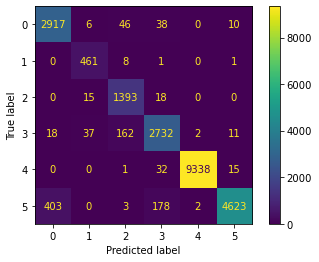

In [10]:
disp.plot()

Feature: outbreak_related, Score: 0.00050
Feature: month_name, Score: 0.28316
Feature: is_holiday, Score: 0.00109
Feature: season, Score: 0.18048
Feature: is_weekend, Score: 0.00122
Feature: retail_and_recreation, Score: 0.26382
Feature: grocery_and_pharmacy, Score: 0.26973
Feature: num_unresolved, Score: 0.00000


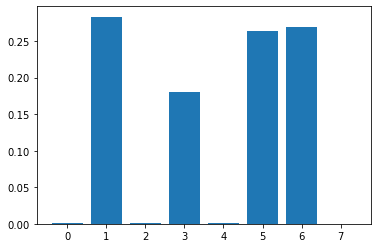

In [11]:
from matplotlib import pyplot
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    feature = feature_names[i]
    print('Feature: %s, Score: %.5f' % (feature,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.454882 to fit


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.454882 to fit



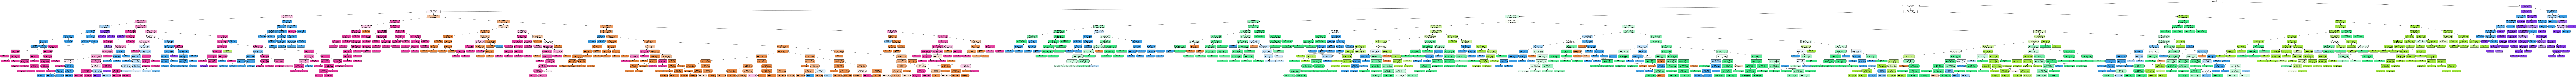

In [12]:
from sklearn.tree import export_graphviz
#pip install graphviz
#pip install pydotplus
# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from graphviz import Source
from IPython.display import Image
dot_data = export_graphviz(
    model,
    feature_names = feature_names,
    class_names = label_list,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
graph_s = Source(dot_data)
png_bytes = graph_s.pipe(format="png")
with open('dtree_pipe.png', 'wb') as f:
    f.write(png_bytes)
Image(graph.create_png())

In [14]:
from sklearn.tree import export_text
r = export_text(model,feature_names=feature_names)

In [15]:
print(r)

|--- season <= 0.98
|   |--- month_name <= 0.90
|   |   |--- month_name <= 0.61
|   |   |   |--- grocery_and_pharmacy <= 0.77
|   |   |   |   |--- retail_and_recreation <= 0.33
|   |   |   |   |   |--- grocery_and_pharmacy <= 0.06
|   |   |   |   |   |   |--- retail_and_recreation <= 0.06
|   |   |   |   |   |   |   |--- grocery_and_pharmacy <= 0.03
|   |   |   |   |   |   |   |   |--- retail_and_recreation <= 0.01
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- retail_and_recreation >  0.01
|   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- grocery_and_pharmacy >  0.03
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- retail_and_recreation >  0.06
|   |   |   |   |   |   |   |--- is_weekend <= 0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- is_weekend >  0.50
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- grocery_and_pharmacy >  0.

In [16]:
# pip install eli5
import eli5
eli5.show_weights(model)

In [17]:
eli5.show_prediction(model, X_train[1], feature_names = feature_names) 